In [2670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2672]:
data = pd.read_csv("train.csv")
data.sample(10)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
1717,6137,ecom,1588502.0,0.0,58820,34171,4663,1517,17.356962,0.222582,2022-09-28 14:56:56.036960208
7743,6478,information_source,6808.0,0.0,0,511,255,1280,12.234537,0.164313,2022-09-03 06:36:46.284116496
7915,2918,information_source,1404233.0,514693.0,0,39557,0,806,2.036395,0.398831,2020-08-20 11:36:18.534467104
3629,9504,social,849841.0,0.0,0,0,14058,1015,8.892971,0.117112,2023-02-25 03:18:26.785669168
2292,3269,information_source,214705.0,67452.0,0,0,3112,0,1.217137,0.180169,2022-11-19 04:41:34.575726904
4542,650,information_source,490426.0,110128.0,0,41081,0,755,6.355876,0.096557,2024-02-06 19:06:05.422637452
6484,4759,ecom,202180.0,10473.0,17234,422,184,1005,26.506519,0.100380,2024-09-13 05:09:14.933849492
416,1080,porn,432865.0,25061.0,0,4766,64314,11261,41.282359,-0.009532,2023-09-20 00:42:06.134508352
5208,5828,information_source,1097783.0,0.0,0,1981,106136,21076,0.048799,0.055362,2022-09-25 05:14:41.830298816
4051,7034,ecom,15169752.0,6499881.0,1169500,215911,0,NaN,6.877270,0.260716,2023-07-06 15:17:45.904409216


In [2674]:
data.dtypes, data.shape

(Unnamed: 0                 int64
 category                  object
 clicks                   float64
 likes                    float64
 buys                       int64
 4xx_errors                 int64
 5xx_errors                 int64
 complaints_count          object
 average_dwelltime        float64
 source_attractiveness    float64
 date_of_registration      object
 dtype: object,
 (8000, 11))

Можем наблюдять, что столбец "date_of_registration" не преобразован в число, а является типом object.

In [2677]:
data["date_of_registration"] = pd.to_datetime(data["date_of_registration"])
data["date_of_registration"] = (pd.Timestamp("2024-10-15")-data["date_of_registration"])/pd.Timedelta(days=365)
data.head(5)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,4.485836
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,0.238375
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,0.255639
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,0.093438
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,0.387772


<Axes: >

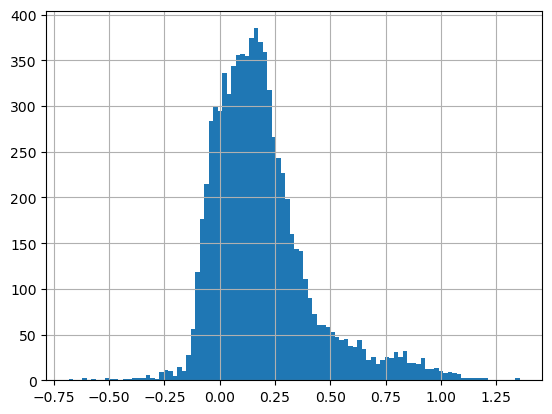

In [2679]:
data["source_attractiveness"].hist(bins = 100)

In [2681]:
data["source_attractiveness"].mean(),data["source_attractiveness"].median(),data["source_attractiveness"].describe()

(0.19199688460706613,
 0.1542557099964202,
 count    8000.000000
 mean        0.191997
 std         0.227873
 min        -0.681718
 25%         0.038220
 50%         0.154256
 75%         0.282510
 max         1.355736
 Name: source_attractiveness, dtype: float64)

# Анализ графика
- `Распределение` похоже на нормальное, где большая часть значений сформированы вокруг среднего.
-  `Выбросы` видны на графике, которые встречаются реже и находятся далеко от центра.
-  `Среднее значение` составляет 0.19199688460706613.
-  `Медиана` составляет 0.1542557099964202.
-  `Основная часть значений` сконцентрирована в диапазоне от -0,25 до 0,50.

# Перейдем к обработке данных и анализу данных

In [2685]:
data["complaints_count"] = pd.to_numeric(data["complaints_count"].replace("-", np.nan))
data["complaints_count"].value_counts()

Y = data["source_attractiveness"]
X = data.drop(columns = 'source_attractiveness')

In [2687]:
data.sample(20)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
4631,7102,ecom,3620589.0,0.0,0,121413,0,1009.0,5.039617,0.112498,1.506859
3388,4474,news,283162.0,0.0,0,46062,0,918.0,0.372303,0.019993,0.962737
3752,2784,ecom,4298473.0,3541205.0,3251824,6792,2912,0.0,38.386040,0.928668,0.512283
5035,8589,information_source,3658279.0,1187950.0,0,205982,0,1771.0,5.076468,0.252381,2.461164
4740,7113,news,446889.0,43270.0,0,41033,47501,NaN,0.612197,-0.027507,1.194401
382,4607,ecom,39988.0,16307.0,0,946,0,583.0,27.495046,0.467042,4.078161
6386,1721,news,2006526.0,154139.0,0,126522,0,0.0,5.150938,0.209225,3.261354
7182,6061,information_source,453482.0,0.0,0,57922,0,0.0,15.438015,0.111014,0.794530
2613,6304,information_source,251512.0,0.0,0,4561,14780,NaN,-1.000000,0.217977,2.826195
2761,3535,ecom,11150110.0,4222650.0,0,316167,0,1294.0,2.777699,0.149673,0.625741


In [2689]:
numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns

numeric_features

Index(['Unnamed: 0', 'clicks', 'likes', 'buys', '4xx_errors', '5xx_errors',
       'complaints_count', 'average_dwelltime', 'date_of_registration'],
      dtype='object')

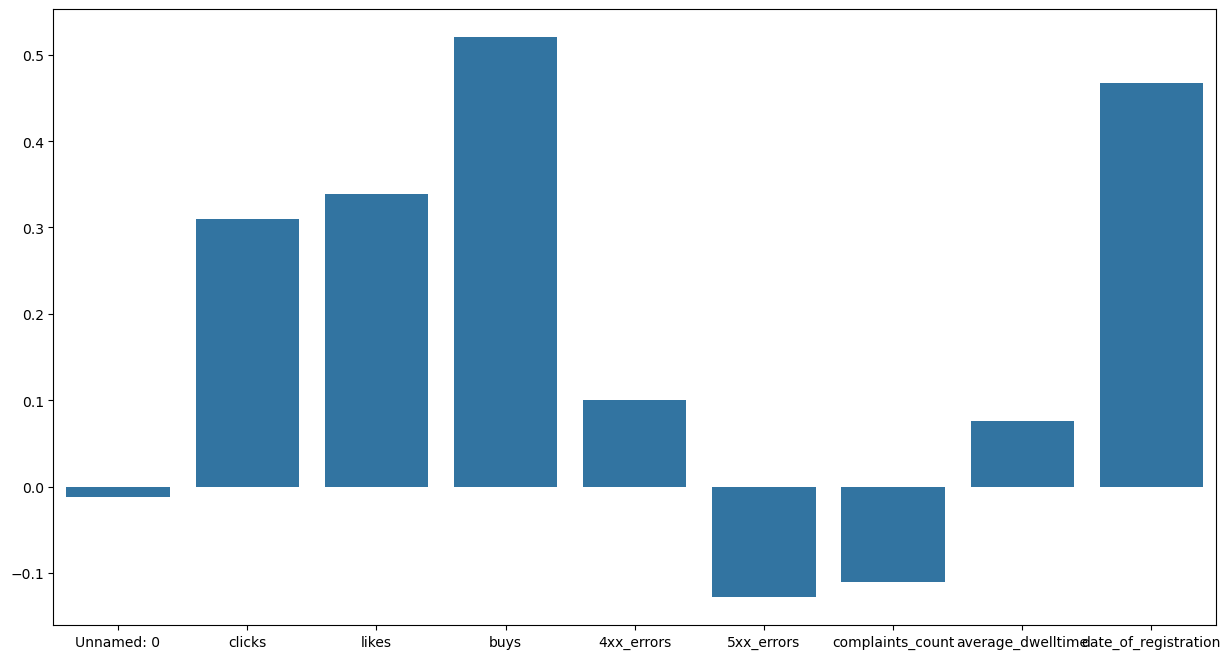

In [2691]:
correl = X[numeric_features].corrwith(Y)

plot = sns.barplot(correl)
plot.figure.set_size_inches(15,8)

# Проанализируем диаграмму корреляции с target переменной

- `Unnamed: 0` корреляция практически равна нулю, что означает, что этот столбец не влияет на целевую переменную(его можно удалить).
- `Clicks and likes` имеют схожие корреляции около 0.3, что говорит о том, что увеличение числа кликов и лайков положительно связано с целевой переменной.
- `5xx_errors` здесь наблюдается отрицательная корреляция, что означает, что увеличение числа ошибок сервера связано с уменьшением целевой переменной. Вероятно, это негативно влияет на взаимодействие с пользователями.
- `average_dwelltime` имеет положительную, но относительно низкую корреляцию с целевой переменной. Это указывает на слабую связь между временем пребывания и целевой переменной.
- `date_of_registration` Демонстрирует довольно сильную положительную корреляцию, более 0.5. Это может означать, что дата регистрации пользователей оказывает значительное влияние на целевую переменную (возможно, чем раньше была регистрация, тем больше вероятность активности пользователя).
- `Buys` имеет самую высокую корреляцию (более 0.5), что указывает на сильную связь с целевой переменной. Это может говорить о том, что покупка является важным индикатором для прогнозируемого значения.
- `4xx_errors` Признак имеет умеренную положительную корреляцию, что может указывать на то, что ошибки клиента (например, 404) также могут иметь некоторое влияние на целевую переменную.
- `complaints_count` наблюдается отрицательная корреляция, значит увеличение кол-во жалоб связано с уменьшением целевой переменной.

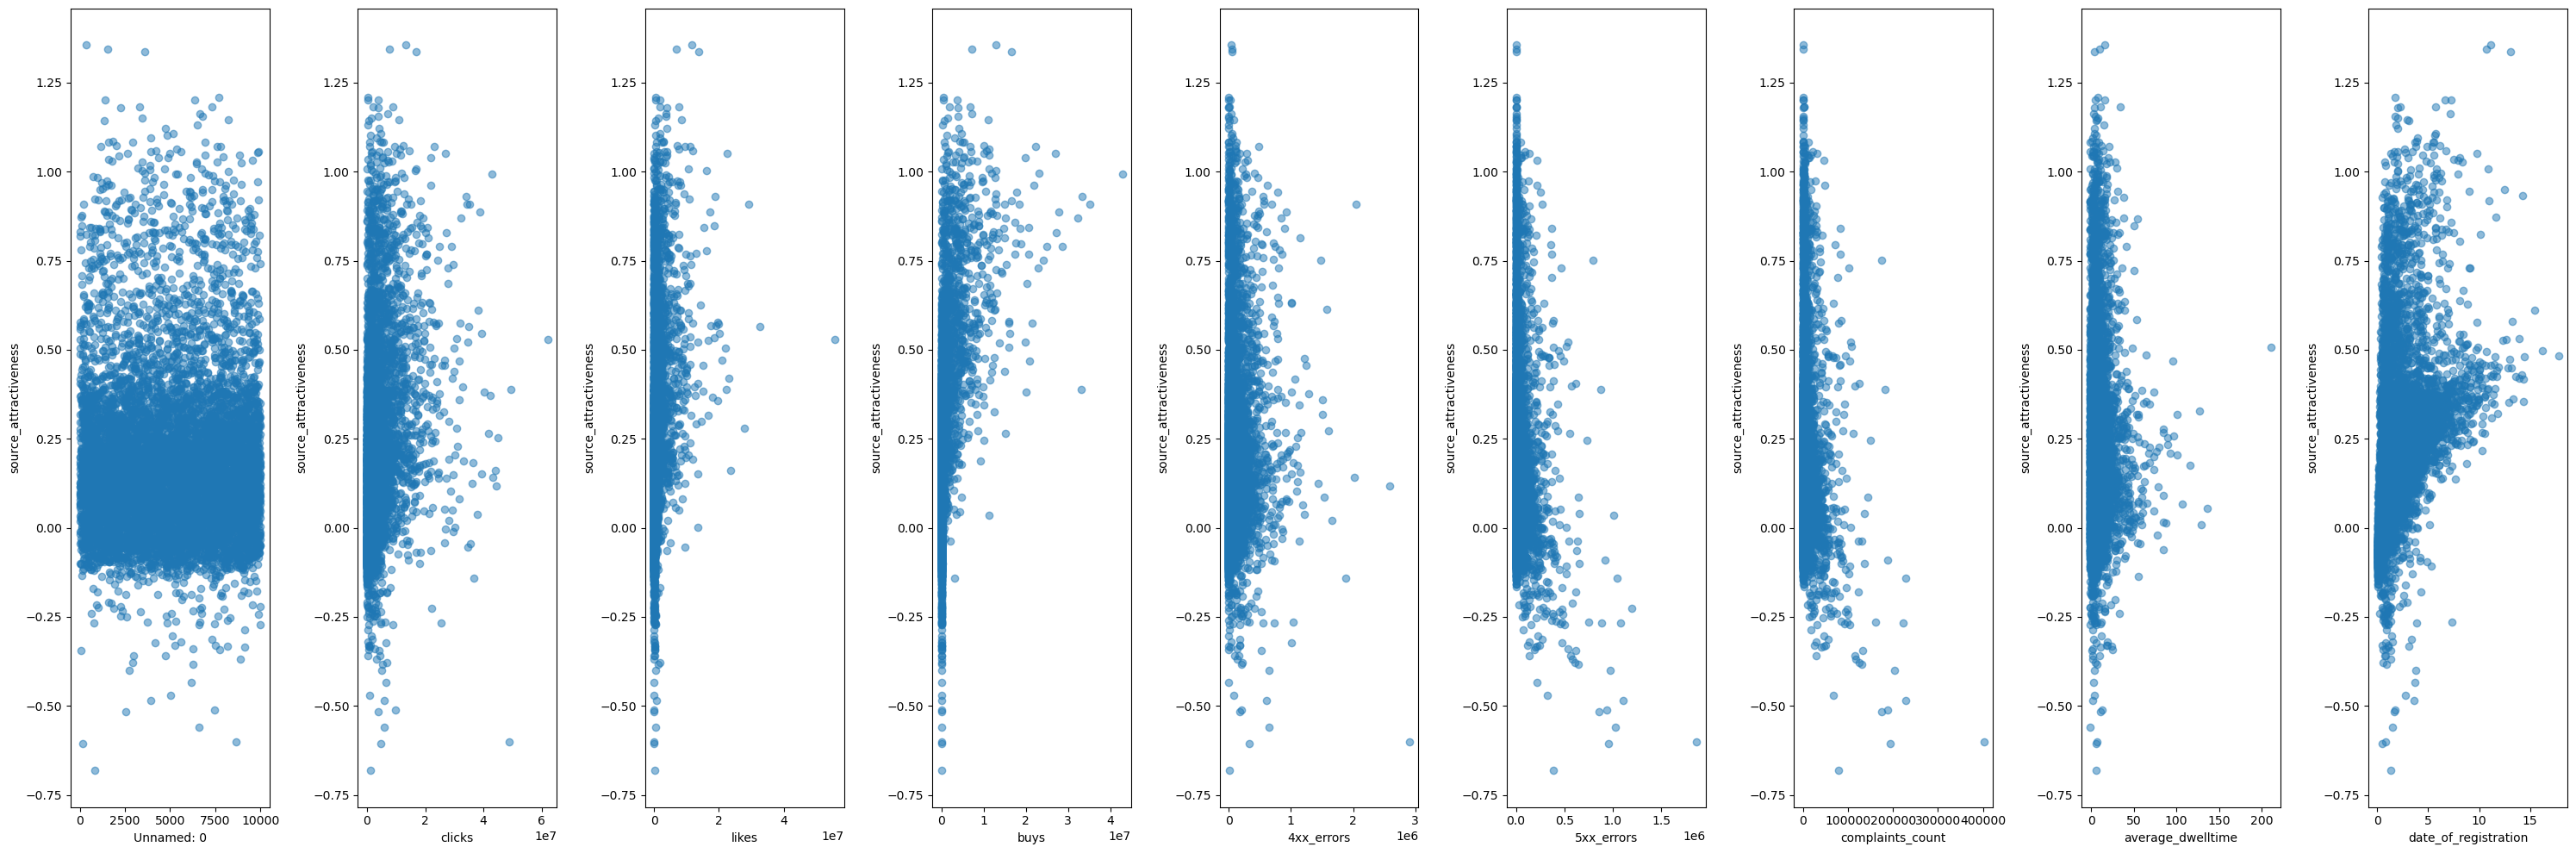

In [2694]:
fig,axs = plt.subplots(figsize=(30,10), ncols=9)
for i, feature in enumerate(numeric_features):
    axs[i].scatter(X[feature], Y, alpha=0.5)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("source_attractiveness")
plt.tight_layout()

In [2695]:
X["Unnamed: 0"].describe()

count    8000.000000
mean     5006.138875
std      2893.886162
min         0.000000
25%      2493.250000
50%      5035.000000
75%      7521.250000
max      9999.000000
Name: Unnamed: 0, dtype: float64

Наши предположения подтвердились, признак "Unnamed: 0" не имеет какой либо корреляции с таргетом.

Теперь поработаем с nan значениями. Для начало попробуем их посчитать.

In [2697]:
nan_counter_columns = data.isna().any(axis=1)
nan_counter = nan_counter_columns.sum()

nan_counter, nan_counter_columns, 1450/8000

(1450,
 0        True
 1       False
 2       False
 3       False
 4       False
         ...  
 7995    False
 7996    False
 7997    False
 7998    False
 7999     True
 Length: 8000, dtype: bool,
 0.18125)

Можно заметить, что строк с nan значениями 1450 это 18% всего дата-сета, довольно много, но вначале попробуем их удалить

In [2702]:
data_clean = data.dropna()


numeric_cols = data.select_dtypes(include=[np.number])  
data[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean()) 

In [2704]:
nan_counter = data_clean.isna().sum()
print(nan_counter)
Y = data_clean["source_attractiveness"]
X = data_clean.drop(columns = "source_attractiveness")

Unnamed: 0               0
category                 0
clicks                   0
likes                    0
buys                     0
4xx_errors               0
5xx_errors               0
complaints_count         0
average_dwelltime        0
source_attractiveness    0
date_of_registration     0
dtype: int64


# Преступим к обучению тестовой модели.

In [2707]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = Ridge()
model.fit(X_train[numeric_features],Y_train)
y_pred = model.predict(x_test[numeric_features])
y_pred_train = model.predict(X_train[numeric_features])

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")

TEST MSE:0.020592713960086023
TRAIN MSE:0.023503089288907417


# Результат довольно слабый, попробуем удалить столбец "Unnamed: 0".

In [2710]:
numeric_features


Index(['Unnamed: 0', 'clicks', 'likes', 'buys', '4xx_errors', '5xx_errors',
       'complaints_count', 'average_dwelltime', 'date_of_registration'],
      dtype='object')

In [2712]:
data_clean_without_UN = data_clean.drop(columns="Unnamed: 0")
numeric_features_UN = numeric_features.drop("Unnamed: 0")

Y = data_clean_without_UN["source_attractiveness"]
X = data_clean_without_UN.drop(columns = "source_attractiveness")

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = Ridge()
model.fit(X_train[numeric_features_UN],Y_train)
y_pred = model.predict(x_test[numeric_features_UN])
y_pred_train = model.predict(X_train[numeric_features_UN])

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")
print(model.coef_)

TEST MSE:0.020617139489906712
TRAIN MSE:0.02350657531362186
[-3.95143395e-09  2.50177663e-08  5.16893775e-08  2.05268465e-08
  4.03067059e-07 -4.98523011e-06  1.35107432e-03  5.19827867e-02]


Уменьшение мы не увидели, а даже наоборот, небольшое увелечение MSE.

# Поработаем с категориальными признаками.

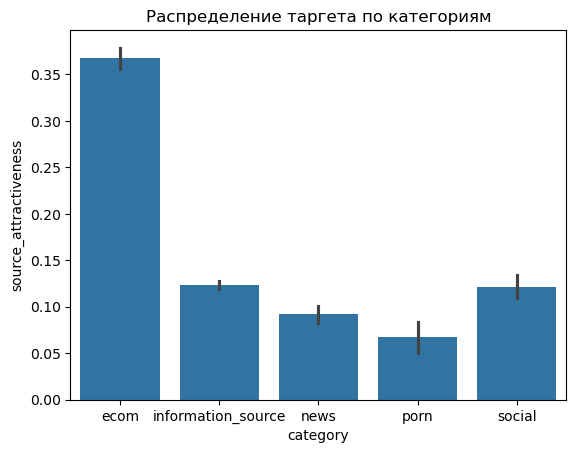

In [2716]:
sns.barplot(x='category', y='source_attractiveness', data = data)
plt.title('Распределение таргета по категориям')
plt.show()

# Анализ корреляции категориального признака с таргетом 
- `ecom` сайты имеют самую большую корреляцию с таргетом, они наоболее значимы для таргета
-  `porn` категория имеет самую низкую карреляцию, что может свидительствовать о не сильном влияние на целевую переменнуюЭ

In [2719]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(data_clean[["category"]])
ohetransform

,category_ecom,category_information_source,category_news,category_porn,category_social
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
7994,0.0,1.0,0.0,0.0,0.0
7995,0.0,1.0,0.0,0.0,0.0
7996,0.0,1.0,0.0,0.0,0.0
7997,0.0,1.0,0.0,0.0,0.0


In [2721]:
data_ohe_clean = pd.concat([data_clean, ohetransform], axis=1).drop(columns="category")
data_ohe_clean

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration,category_ecom,category_information_source,category_news,category_porn,category_social
1,2047,874840.0,21100.0,0,12872,0,0.0,10.721619,-0.022317,0.238375,0.0,1.0,0.0,0.0,0.0
2,1118,571210.0,94707.0,0,0,7420,0.0,1.922243,0.046396,0.255639,0.0,1.0,0.0,0.0,0.0
3,4992,89534.0,924.0,0,834,0,0.0,2.149243,-0.093360,0.093438,0.0,0.0,1.0,0.0,0.0
4,9970,1043953.0,289288.0,0,58375,20260,3948.0,3.764965,0.027303,0.387772,0.0,1.0,0.0,0.0,0.0
6,4553,99712.0,0.0,0,0,15178,3725.0,20.786928,0.063572,1.473325,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,5931,4221099.0,1204744.0,0,336212,24270,8234.0,0.451923,0.115761,0.887457,0.0,1.0,0.0,0.0,0.0
7995,361,1468601.0,474524.0,0,61307,83928,16841.0,4.191481,0.017470,1.321027,0.0,1.0,0.0,0.0,0.0
7996,2621,93172.0,6418.0,0,3418,705,0.0,3.745192,-0.019069,0.231877,0.0,1.0,0.0,0.0,0.0
7997,2605,82916.0,0.0,0,4302,1718,1007.0,5.837475,-0.061523,0.328112,0.0,1.0,0.0,0.0,0.0


In [2723]:
Y = data_ohe_clean["source_attractiveness"]
X = data_ohe_clean.drop(columns="source_attractiveness")

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = Ridge()
model.fit(X_train,Y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")
print(model.coef_)

TEST MSE:0.014889597940280639
TRAIN MSE:0.015868599621389652
[-5.03372552e-07 -1.87325128e-08  2.69774627e-08  4.83347934e-08
  1.42401602e-07  3.78973196e-07 -4.19502061e-06  1.88694793e-03
  5.34463402e-02  1.98339625e-01 -1.06006739e-02 -4.02878630e-02
 -8.88001558e-02 -5.86509327e-02]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.69339e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Видим значительное улучшение результата. Теперь перейдем к стандартизации данных

In [2726]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ["category"]),
    ('scaling', StandardScaler(), numeric_features)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

Y = data_clean["source_attractiveness"]
X = data_clean.drop(columns="source_attractiveness")
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = ridge_pipeline.fit(X_train, Y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")
#print(model.coef_)


TEST MSE:0.014886418928261539
TRAIN MSE:0.015868704041231044


После стандартизации прирост не сильно большой.

In [2729]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(ridge_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
searcher.fit(X_train, Y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])


model = ridge_pipeline.fit(X_train, Y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")
#print(model.coef_)

Best alpha = 3.3598
TEST MSE:0.01487441941164611
TRAIN MSE:0.015869539501019027


/var/folders/dw/tx_kmk190xxc7899v7m7xlkm0000gn/T/ipykernel_93551/3704781656.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='source_attractiveness', ylabel='Density'>

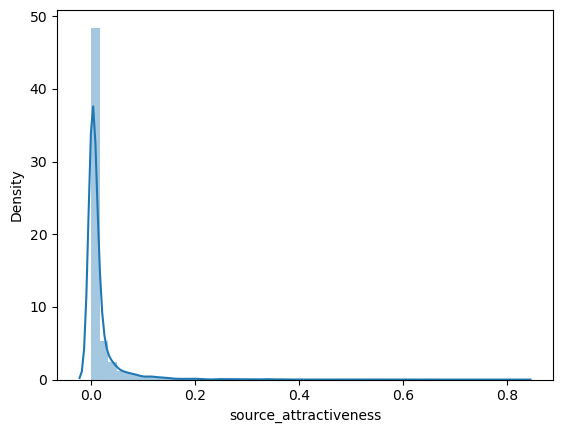

In [2730]:
error = (Y_train - y_pred_train) ** 2
sns.distplot(error)

In [2731]:
mask = (error < np.quantile(error, 0.99))
model = ridge_pipeline.fit(X_train[mask], Y_train[mask])
y_pred = model.predict(x_test)

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")

TEST MSE:0.014811915857657617


In [2732]:
numeric_features_DR = numeric_features.drop("date_of_registration")
numeric_features_DR_UN = numeric_features_DR.drop("Unnamed: 0")

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ["category"]),
    ('scaling', StandardScaler(), numeric_features_DR_UN)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])


data_DR = data_clean.drop(columns="date_of_registration")
Y = data_DR["source_attractiveness"]
X = data_DR.drop(columns="source_attractiveness")
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

model = ridge_pipeline.fit(X_train, Y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(X_train)

print(f"TEST MSE:{mean_squared_error(y_pred, y_test)}")
print(f"TRAIN MSE:{mean_squared_error(y_pred_train, Y_train)}")

TEST MSE:0.026154132486972112
TRAIN MSE:0.027197934813911598


In [2733]:
#data_clean.columns
data

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,598502.743179,0,82221,0,0.000000,18.450527,0.461750,4.485836
1,2047,information_source,874840.0,21100.000000,0,12872,0,0.000000,10.721619,-0.022317,0.238375
2,1118,information_source,571210.0,94707.000000,0,0,7420,0.000000,1.922243,0.046396,0.255639
3,4992,news,89534.0,924.000000,0,834,0,0.000000,2.149243,-0.093360,0.093438
4,9970,information_source,1043953.0,289288.000000,0,58375,20260,3948.000000,3.764965,0.027303,0.387772
...,...,...,...,...,...,...,...,...,...,...,...
7995,361,information_source,1468601.0,474524.000000,0,61307,83928,16841.000000,4.191481,0.017470,1.321027
7996,2621,information_source,93172.0,6418.000000,0,3418,705,0.000000,3.745192,-0.019069,0.231877
7997,2605,information_source,82916.0,0.000000,0,4302,1718,1007.000000,5.837475,-0.061523,0.328112
7998,1231,social,823896.0,105666.000000,0,0,2892,267.000000,11.994037,0.131620,1.347616


In [2734]:
numeric_columns = X.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()

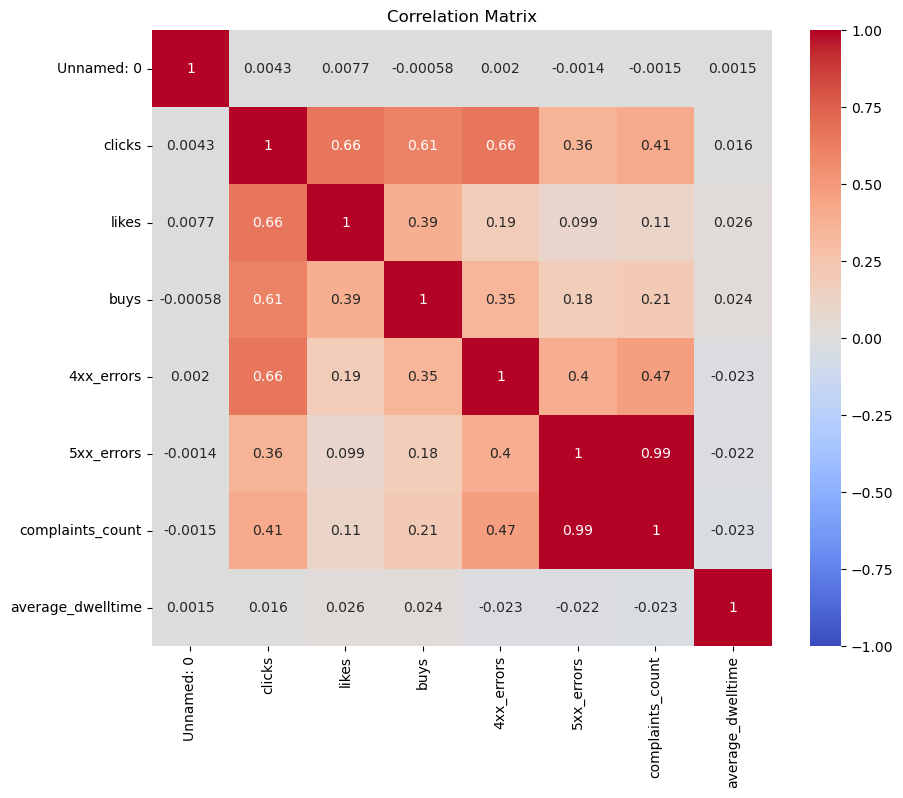

In [2738]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [2743]:

#data = data.drop(columns="date_of_registration^2").drop(columns="4xx+5xx^2")

#numeric_features_UN = numeric_features.drop("Unnamed: 0")
#data.loc[:, "4xx+5xx"] = data["4xx_errors"] + data["5xx_errors"]
data.loc[:, "buys^2"] = data["buys"] * data["buys"]
#data.loc[:, "4xx+5xx^2"] = data.loc[:, "4xx+5xx"]*data.loc[:, "4xx+5xx"]
data.loc[:, "date_of_registration^2"] = data["date_of_registration"] * data["date_of_registration"]
data.loc[:, "involvement"] = (data.loc[:, "clicks"] + data["likes"])
#data.loc[:, "involvement^2"] = data.loc[:, "involvement"] * data["involvement"]
#data.loc[:, "date_of_registration^3"] = (data.loc[:, "date_of_registration^2"] + data["date_of_registration"])
data.loc[:, "buys_per_time"] = (data.loc[:, "buys"] / data["average_dwelltime"])
#data.loc[:, "likes_per_time"] = (data.loc[:, "likes"] / data["average_dwelltime"])
#data.loc[:, "activities_per_time"] = (data.loc[:, "likes"]+data.loc[:, "buys"]+ data.loc[:, "clicks"])/ data["average_dwelltime"]


#data.loc[:, "buys_per_time^2"] = (data.loc[:, "buys_per_time"] * data["buys_per_time"])
data.loc[:, "cliks_per_time"] = (data.loc[:, "clicks"] / data["average_dwelltime"])







#numeric_features_5xx_CC = numeric_features_5xx.drop("complaints_count")
#numeric_features_5xx_CC_UN = numeric_features_5xx.drop("")
numeric_features_45 = data.select_dtypes([np.number]).columns
numeric_features_45 = numeric_features_45.drop("source_attractiveness")

#numeric_features_45 = numeric_features_45.drop("buys_per_time^2")

#numeric_features_45 = numeric_features_45.drop("involvement")

#numeric_features_45 = numeric_features_45.drop("Unnamed: 0")
#numeric_features_45 = numeric_features_45.drop("complaints_count")
#numeric_features_45 = numeric_features_45.drop("4xx+5xx^2")
#numeric_features_45 = numeric_features_45.drop("4xx+5xx")

numeric_features_45 = numeric_features_45.drop("4xx_errors").drop("5xx_errors")
#numeric_features_45 = numeric_features_45.drop("clicks")
numeric_features_45 = numeric_features_45.drop("likes")

numeric_features_45 = numeric_features_45.drop("Unnamed: 0")
#data_clean = data_clean.drop(columns="buys^3")
numeric_features_45
#data_clean = data_clean.drop(columns="involvement").drop(columns="involvement^2")

Index(['clicks', 'buys', 'complaints_count', 'average_dwelltime',
       'date_of_registration', 'buys^2', 'date_of_registration^2',
       'involvement', 'buys_per_time', 'cliks_per_time'],
      dtype='object')

In [2745]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), ["category"]),
    ('scaling', StandardScaler(), numeric_features_45)
])

ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])


Y = data["source_attractiveness"]
X = data.drop(columns="source_attractiveness")
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=10)



model = ridge_pipeline.fit(X, Y)
#y_pred = model.predict(x_test)
#y_pred_train = model.predict(X_train)

#print(f"TEST MSE: %.6f" % mean_squared_error(y_pred, y_test))
#print(f"TRAIN MSE: %.6f" % mean_squared_error(y_pred_train, Y_train))

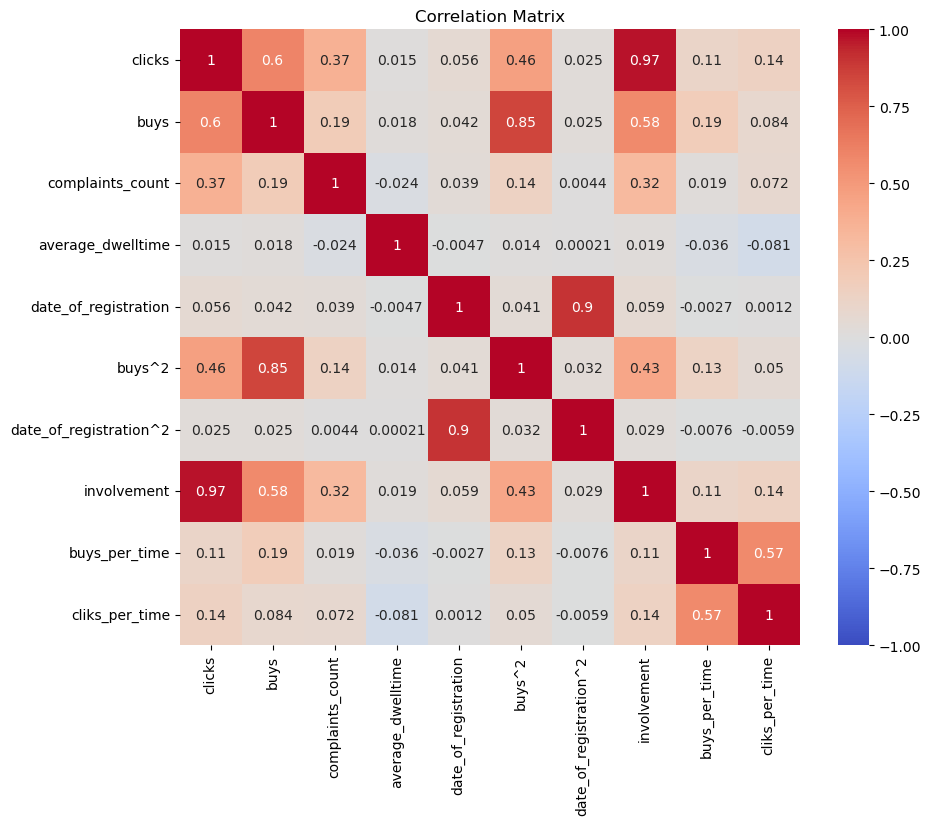

In [2747]:
numeric_columns = X[numeric_features_45].select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

BEST Test MSE = 0.010796



In [2750]:
data_clean.sample(10)

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
4999,8108,information_source,2582135.0,403767.0,0,52443,53898,11223.0,5.452317,-0.070721,0.229901
5470,8938,information_source,2641937.0,1173533.0,0,66411,0,1830.0,9.991337,0.332245,2.057275
7567,3020,ecom,2398136.0,0.0,2045569,23833,92981,17814.0,1.463827,0.769310,2.494467
1856,6546,ecom,2031634.0,1532058.0,1027852,20226,0,0.0,19.922419,0.665670,0.721939
2918,758,news,243397.0,14026.0,0,14937,1123,1316.0,0.925953,-0.055057,0.474899
547,2536,information_source,20954.0,7.0,0,22,0,1319.0,2.957752,-0.104556,0.045973
2408,4948,information_source,11617.0,314.0,0,0,35,155.0,1.795504,-0.084078,0.104519
7091,1095,information_source,1023897.0,0.0,0,51181,48073,10922.0,2.881062,0.086033,2.120386
7212,6762,ecom,1095863.0,93511.0,277491,0,0,0.0,9.424362,0.113138,0.188309
7989,9743,information_source,191744.0,0.0,0,7833,3737,571.0,1.572932,-0.075084,0.400956


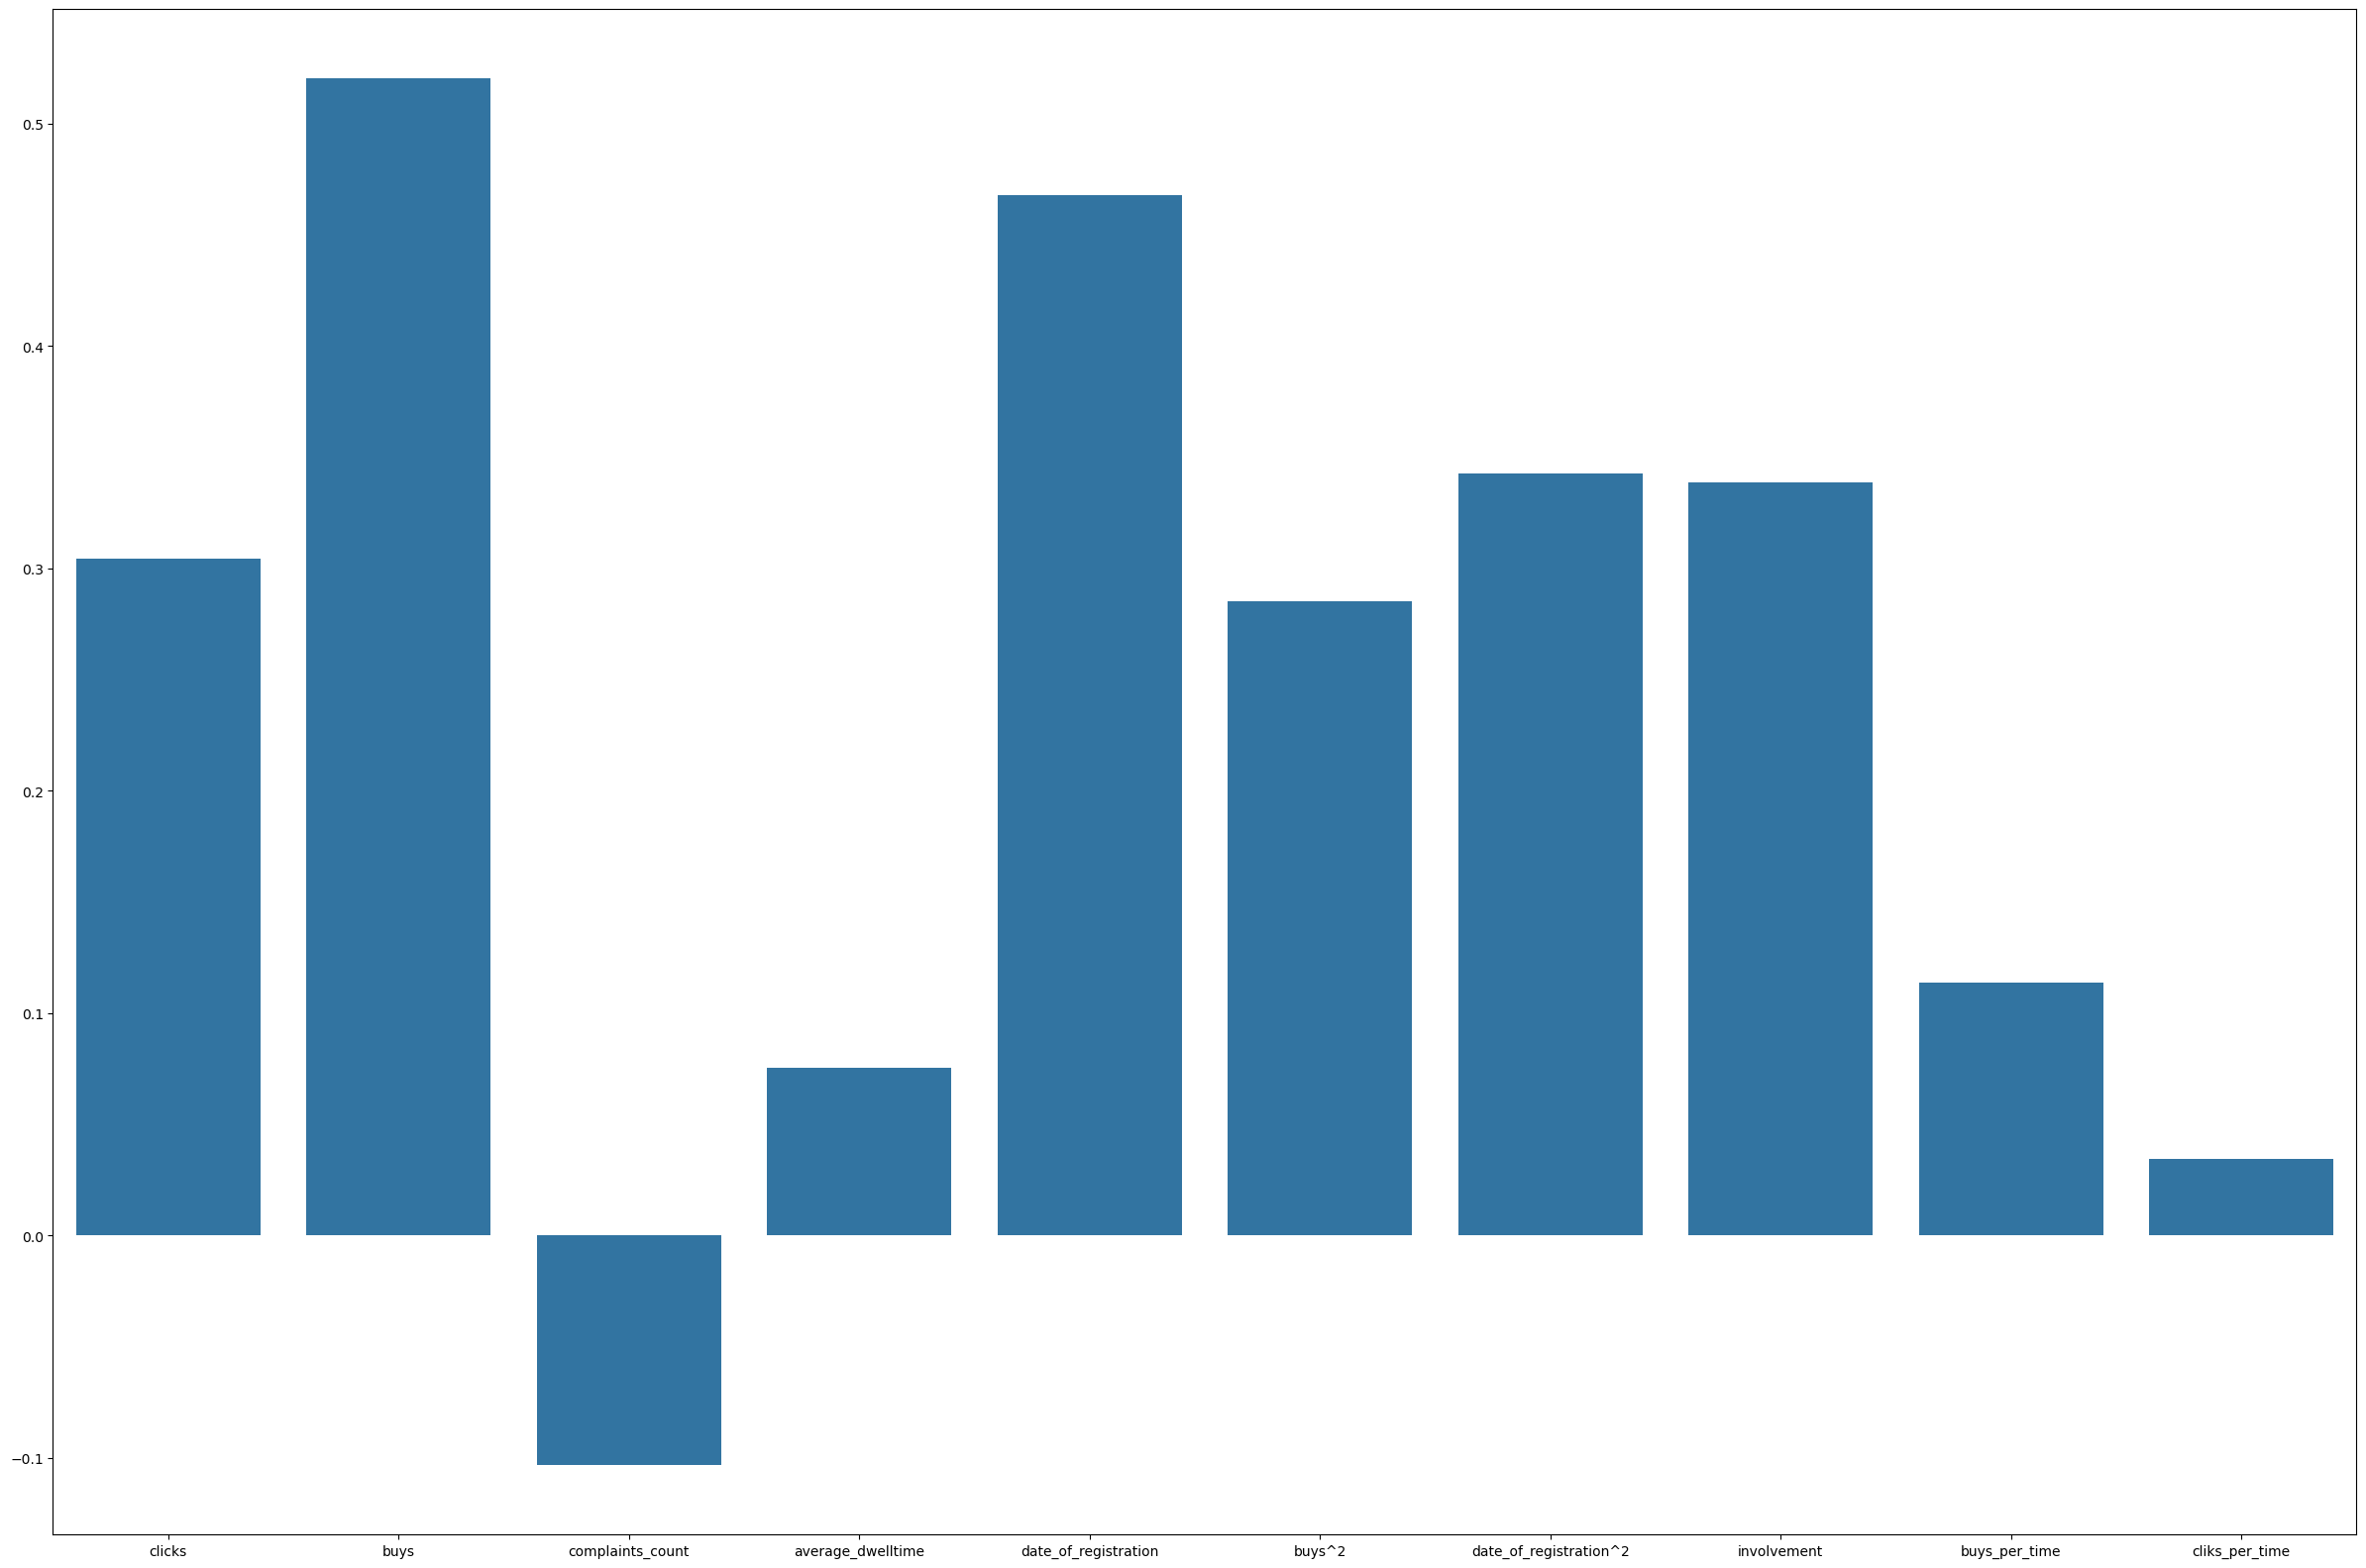

In [2752]:
correl = X[numeric_features_45].corrwith(Y)

plot = sns.barplot(correl)
plot.figure.set_size_inches(30,20)

In [2754]:
def predict(data_path):    
    data = pd.read_csv(data_path)
    data['complaints_count'] = pd.to_numeric(data['complaints_count'].replace(['-', 'None', 'N/A', 'nan'], np.nan), errors='coerce')
    data['date_of_registration'] = pd.to_datetime(data['date_of_registration'])
    data["date_of_registration"] = (pd.Timestamp('2024-10-12')-data["date_of_registration"])/pd.Timedelta(days=365)
    numeric_cols = data.select_dtypes(include=[np.number])  
    data[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean()) 
    print(data.dtypes)
    
    #data_clean.loc[:, "4xx+5xx"] = data_clean["4xx_errors"] + data_clean["5xx_errors"]
    data.loc[:, "buys^2"] = data["buys"] * data["buys"]
    #data_clean.loc[:, "4xx+5xx^2"] = data_clean.loc[:, "4xx+5xx"]*data_clean.loc[:, "4xx+5xx"]
    data.loc[:, "date_of_registration^2"] = data["date_of_registration"] * data["date_of_registration"]
    data.loc[:, "involvement"] = (data.loc[:, "clicks"] + data["likes"])
    #data_clean.loc[:, "involvement^2"] = data_clean.loc[:, "involvement"] * data_clean["involvement"]
    #data_clean.loc[:, "date_of_registration^3"] = (data_clean.loc[:, "date_of_registration^2"] + data_clean["date_of_registration"])
    data.loc[:, "buys_per_time"] = (data.loc[:, "buys"] / data["average_dwelltime"])
    #data_clean.loc[:, "likes_per_time"] = (data_clean.loc[:, "likes"] / data_clean["average_dwelltime"])
    #data_clean.loc[:, "activities_per_time"] = (data_clean.loc[:, "likes"]+data_clean.loc[:, "buys"]+ data_clean.loc[:, "clicks"])/ data_clean["average_dwelltime"]
    #data_clean.loc[:, "buys_per_time^2"] = (data_clean.loc[:, "buys_per_time"] * data_clean["buys_per_time"])
    data.loc[:, "cliks_per_time"] = (data.loc[:, "clicks"] / data["average_dwelltime"])
    #print(data.isna().any())
    predicts = model.predict(data)
    return predicts


In [2756]:
data = {
    "source_attractiveness": predict("test.csv")
}
submit = pd.DataFrame(data)
submit.to_csv('submission.csv', index_label="ID")

ID                        int64
category                 object
clicks                  float64
likes                   float64
buys                      int64
4xx_errors                int64
5xx_errors                int64
complaints_count        float64
average_dwelltime       float64
date_of_registration    float64
dtype: object
